In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('noaa_isd_data.csv',
                 dtype={"usaf_station_id": str, "wban_station_id": str},
                 parse_dates=['date'])
df['station_id'] = df.usaf_station_id + "-" + df.wban_station_id
print(df.shape)
df.head()

C:\Users\Mike\Anaconda3\envs\basic\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2128659, 13)


,Unnamed: 0,var_data_len,usaf_station_id,wban_station_id,date,latitude,longitude,report_type,elevation_meters,call_letters,qc_process,air_temp_c,station_id
0,0,191,723930,93214,2019-01-01 00:58:00,34.717,-120.566,FM-15,112.0,KVBG,V02,10.4,723930-93214
1,1,179,723930,93214,2019-01-01 01:58:00,34.717,-120.566,FM-15,112.0,KVBG,V02,9.0,723930-93214
2,2,196,723930,93214,2019-01-01 02:58:00,34.717,-120.566,FM-15,112.0,KVBG,V02,9.2,723930-93214
3,3,134,723930,93214,2019-01-01 03:58:00,34.737,-120.584,FM-15,112.0,NaN,V02,8.5,723930-93214
4,4,175,723930,93214,2019-01-01 04:58:00,34.717,-120.566,FM-15,112.0,KVBG,V02,8.1,723930-93214


In [3]:
df.station_id.value_counts()

999999-53139    105497
999999-53151    105497
999999-53152    105485
999999-53150    105461
999999-93243    105425
                 ...  
724937-23289      4401
720687-99999      2829
725940-24213      2722
999999-23272       778
999999-23271       743
Name: station_id, Length: 139, dtype: int64

In [4]:
df.date.describe(), df.date.max(), df.date.min()

(count                 2128659
 unique                 270560
 top       2019-02-01 07:59:00
 freq                      173
 first     2019-01-01 00:00:00
 last      2019-12-31 23:58:00
 Name: date, dtype: object,
 Timestamp('2019-12-31 23:58:00'),
 Timestamp('2019-01-01 00:00:00'))

In [5]:
mask = df.station_id.isin(df.station_id.value_counts().index[:3])
SKIP = 1
mask &= df.date.isin(df.date.iloc[::SKIP])

In [6]:
print(df[mask].shape)
df[mask].head(5)

(316479, 13)


,Unnamed: 0,var_data_len,usaf_station_id,wban_station_id,date,latitude,longitude,report_type,elevation_meters,call_letters,qc_process,air_temp_c,station_id
232593,232593,521,999999,53152,2019-01-01 00:00:00,34.414,-119.88,CRN05,5.0,NaN,V02,15.1,999999-53152
232594,232594,133,999999,53152,2019-01-01 00:05:00,34.414,-119.88,CRN05,5.0,NaN,V02,14.9,999999-53152
232595,232595,133,999999,53152,2019-01-01 00:10:00,34.414,-119.88,CRN05,5.0,NaN,V02,14.9,999999-53152
232596,232596,133,999999,53152,2019-01-01 00:15:00,34.414,-119.88,CRN05,5.0,NaN,V02,14.8,999999-53152
232597,232597,133,999999,53152,2019-01-01 00:20:00,34.414,-119.88,CRN05,5.0,NaN,V02,14.7,999999-53152


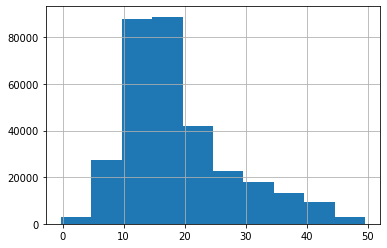

In [7]:
df[mask].air_temp_c.hist();

C:\Users\Mike\Anaconda3\envs\basic\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


C:\Users\Mike\Anaconda3\envs\basic\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


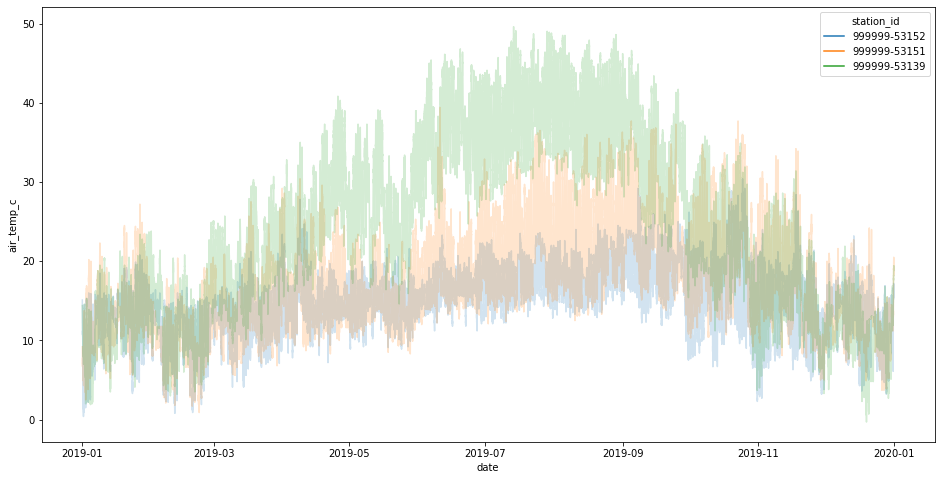

In [8]:
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=df[mask],
             sort=True,
             alpha=0.2,
             x='date',
             y='air_temp_c',
             hue='station_id',
             ax=ax)